<a href="https://colab.research.google.com/github/ipolakovic/EDA_Video/blob/trial/IE_GROUP_VIDEO_RBA_KYC_STARTERCODE_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="profile_manoelgadi.png" width=100 height=100 align="right">

Author: Manoel Gadi

Last revision: 19/July/2020

---

Welcome to the GROUP VIDEO starter code.

Your group task is to record a video of 10 - 15 minutes CLEANING DATA and DEVELOPING 2 MODELS using the RBA_KYC_Accounts_ALL_Ids.xlsx dataset. You should use Pandas, Matplotlib and Scikit Learn (Sklearn) libraries only if possible. Your video should include:

* A quick explanation of Pandas, Matplotlib and Sklearn, specially including their histories. (less than a minute)
* A quick Exploratory Data Analysis of the data set used.
* Using the EDA, explain the problems of data quality in this data set.
* Research about data preparation with Python. Propose and implement ways to clean, input missing and prepare the data for modelling. (YOUR VIDEO SHOULD FOCUS IN THIS PART - 70-80% OF THE VIDEO SHOULD BE ABOUT DATA CLEANING AND DATA PREPARATION)
* Then, develop one Regression model using rbaValue as target variable.  Remember to assess the model performance using an appropriate measure for regression. 
* Then, develop one binary Classification model using Risk_Description setting Risk_Description = Low as 0 and else 1 (Medium or High). Remember to assess your model performance using a appropriate measure for classification.

ps. please, don't improve the model, you don't need to make good one, simply do a quick one! This exercise is about explaining, in a video lecture, how to prepare the data for modelling , not about making a good model .

ps. You can apply any of the steps in the model development seing in the last class, but be coincious of time it may take to do it all, so avoid overcomplicating things.

Please find below couple videos from previous years (different data set and different objective) and from which you'll also learn some Python ideas:

* 2018 MBD01 Group E Variable Transformation - https://www.youtube.com/watch?v=j_0HQ2UF_L0
* 2019 - Risk & Fraud Analytics - Scikit Learn & Lending Club - Group C - https://www.youtube.com/watch?v=oTmHMXsksM8

---

### Importing the database: RBA_KYC_Accounts_ALL_Ids.xlsx

In [2]:
import os
os.getcwd()

'/content'

In [ ]:
import pandas as pd
df = pd.read_excel('RBA_KYC_Accounts_ALL_Ids.xlsx')

In [ ]:
df['Risk_Description'] = df['rba_grade_desc']
df.drop(['rba_grade_desc'], axis = 1, inplace = True) 

## Checking some quick statistics

In [ ]:
df.describe()

,org_code,branchCode,customerId,customerType,residentStatus,age_in_year,birthCountry,profession,companyType,lastUpdate,...,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card_Desc,rbaValue
count,224868.0,224868.000000,2.248680e+05,224868.000000,224868.000000,220153.000000,0.0,79748.000000,114574.000000,0.0,...,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,0.0,224868.000000
mean,1.0,448.451323,4.394503e+16,1.114418,1.021221,41.310575,NaN,18.309487,49.857577,NaN,...,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,17.624194
std,0.0,228.193308,2.349321e+16,0.318319,0.144122,16.000536,NaN,6.586481,6.736115,NaN,...,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,8.368345
min,1.0,201.000000,2.020028e+09,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,...,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,4.080000
25%,1.0,208.000000,2.070207e+16,1.000000,1.000000,31.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,13.330000
50%,1.0,401.000000,4.011205e+16,1.000000,1.000000,41.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,16.530000
75%,1.0,701.000000,7.012410e+16,1.000000,1.000000,52.000000,NaN,21.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,21.330000
max,1.0,805.000000,8.052929e+16,2.000000,2.000000,119.000000,NaN,39.000000,100.000000,NaN,...,1267.000000,0.000000e+00,3292.000000,5.867291e+05,78.000000,8.394000e+06,2858.000000,9.942530e+06,NaN,100.000000


## Creating the variable creationDate_indays

In [ ]:
df['creationDate_indays'] = df['creationDate'].astype('datetime64[ns]').max()-df['creationDate'].astype('datetime64[ns]') 
df['creationDate_indays'].head()

0   1295 days
1   1860 days
2   1860 days
3   1860 days
4   1860 days
Name: creationDate_indays, dtype: timedelta64[ns]

## Creating the variable date of birth

In [ ]:
def f(end):
    global max_date
    try:
        #r = relativedelta(pd.to_datetime('now'), end) 
        r = relativedelta(max_date, end) 
        return(r.years)
    except:
        return '{} years {} days'.format(r.years, r.days)
        #return(0)
#    r = relativedelta(pd.to_datetime('now'), end) 
#    return '{} years {} days'.format(r.years, r.days)

In [ ]:
max_date = df['dateOfBirth'].astype('datetime64[ns]').max()
df['age'] = df['dateOfBirth'].astype('datetime64[ns]').apply(f)
df['age'].head()

UnboundLocalError: local variable 'r' referenced before assignment

## Checking for percentage (%) of missing values

In [ ]:
100*df.isnull().sum()/df.isnull().count()

org_code                        0.000000
branchCode                      0.000000
customerId                      0.000000
fullaccount                     0.000000
customerType                    0.000000
creationDate                    0.000000
onboarding                      0.000000
residentStatus                  0.000000
residentCountry                 0.265044
nationalityOriginal             1.529342
extraNationality               99.202643
dateOfBirth                     2.096786
age_in_year                     2.096786
birthCountry                  100.000000
birthPlace                      9.713254
profession                     64.535639
companyType                    49.048331
giinCode                       99.994664
lastUpdate                    100.000000
status                          0.000000
ledgerCode                      0.000000
accountCurrency                 0.000000
jointAccount                    0.000000
IsBlackListed                   0.000000
CUS_CLASS       

## Making some histograms

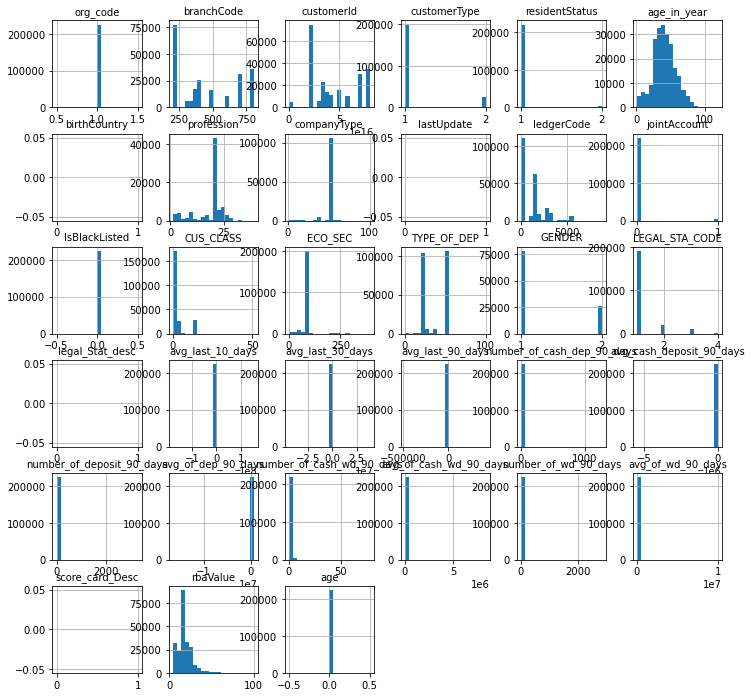

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

### Now, is your group turn: 
...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224868 entries, 0 to 224867
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   org_code                    224868 non-null  int64          
 1   branchCode                  224868 non-null  int64          
 2   customerId                  224868 non-null  int64          
 3   fullaccount                 224868 non-null  object         
 4   customerType                224868 non-null  int64          
 5   creationDate                224868 non-null  object         
 6   onboarding                  224868 non-null  object         
 7   residentStatus              224868 non-null  int64          
 8   residentCountry             224272 non-null  object         
 9   nationalityOriginal         221429 non-null  object         
 10  extraNationality            1793 non-null    object         
 11  dateOfBirth               

In [ ]:
for i in list(df):
    print(df[i].value_counts())

1    224868
Name: org_code, dtype: int64
202    19684
208    15974
704    12882
701    11332
805    10428
801     9262
502     8870
206     8598
207     8458
403     7673
501     7556
354     7483
209     7453
402     7339
702     6985
205     6674
401     6653
601     6046
351     5958
802     5782
302     5716
803     5494
356     5376
203     5097
204     5083
804     4525
357     4355
603     4245
404     3691
201      196
Name: branchCode, dtype: int64
30205511090005696    943
35108255290001427    723
20702061400001087    700
2060022929           513
20600229290003418    513
                    ... 
35100754940002032      1
60300417980001162      1
20300468800002406      1
40300684080003153      1
35400449070002754      1
Name: customerId, Length: 75339, dtype: int64
020902507770010010000    26
020301298000011306000    23
020301298000011930000    23
020301298000012957000    23
020301298000011316000    23
                         ..
070124003000010020000     1
020200508700011389000

---

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
missing = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

C:\Users\nunom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


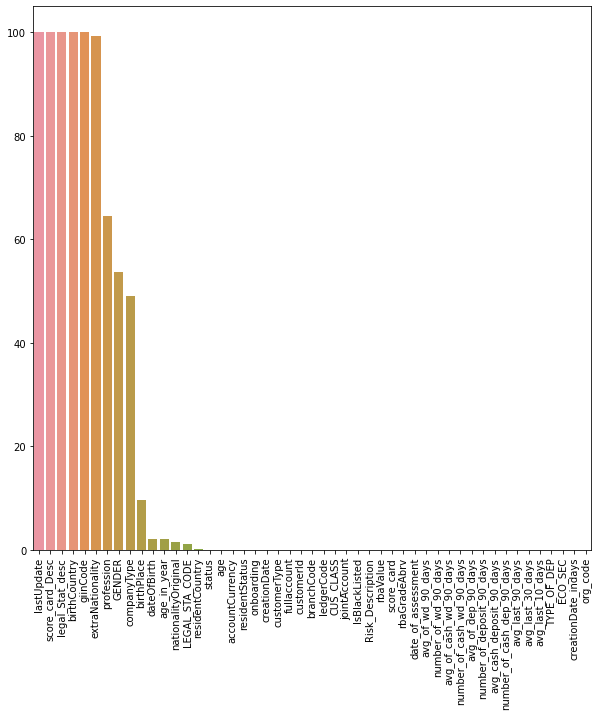

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(missing.index,missing)
plt.xticks(rotation=90);

### 1. Drop **org_code** since it only has 1 distinct value


In [ ]:
df.drop(['org_code'], axis = 1)

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,...,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,score_card,score_card_Desc,rbaValue,Risk_Description,creationDate_indays,age
0,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,...,0,0.0,2019-01-24,L,E-Existing,NaN,13.20,Low,1295 days,0
1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,...,0,0.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1860 days,0
2,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,...,0,0.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1860 days,0
3,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,...,1,50.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1860 days,0
4,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,...,1,56.0,2019-01-24,L,I-Existing,NaN,16.93,Low,1860 days,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224863,404,40400811920003507,040400811920010020000,1,2017-10-22,N,1,JO,JO,NaN,...,0,0.0,2019-01-24,L,I-Existing,NaN,16.53,Low,364 days,0
224864,202,20200577640010547,020200577640015300042,2,2004-07-27,N,1,JO,JO,NaN,...,0,0.0,2019-01-24,M,E-Existing,NaN,57.60,Medium,5199 days,0
224865,502,50220271300005255,050220271300012980002,1,2000-08-23,N,1,JO,JO,NaN,...,0,0.0,2019-01-24,L,I-Existing,NaN,14.53,Low,6633 days,0
224866,704,70424500690004664,070424500690011396000,1,2008-01-16,N,1,JO,JO,NaN,...,0,0.0,2019-01-24,M,I-Existing,NaN,24.53,Medium,3931 days,0


# how to filter all the non numeric values in a column? (1)

### in the code/categorical columns there needs to be created lists to check for values that are not in the list - 2
customerId: 1

full account: repeated values would mean duplicates, there should not be repeated full account numbers

creationDate: need to check all non date values

residentCountry: 2
nationalityOriginal: 2

dateOfBirth: need to check all non date values

birthPlace: check all values that are not places

profession: 2

companyType: 1

giincode: might just drop it, since it only has one code

status: might drop it since they are all "active"

ledgerCode: 2

accountCurrency: check for values that are not in the currency list

jointAccount: 2

IsBlackListed: might just drop it, since it only has 0's

CUS_CLASS: 2
ECO_SEC: 2
TYPE_OF_DEP: 2
GENDER: 2
LEGAL_STA_CODE: 2

avg_last_10_days:1
avg_last_30_days:1
avg_last_90_days:1
...
avg_of_wd_90_days:1

date_of_assessment: drop it since there is only one date

rbaGradeAbrv: 2
score_card:2

rbaValue: 1

Risk_Description:2

## Creating lists for all the categoric variables

In [ ]:
metadata_countries = pd.read_excel('RBA Metadata.xlsx', sheet_name='COUNTRIES')
countries_list = list(metadata_countries['value'])
print (countries_list)

['AD', 'AF', 'AG', 'AN', 'AO', 'AQ', 'AR', 'AS', 'AW', 'BA', 'BB', 'BH', 'BM', 'BN', 'BS', 'BV', 'BZ', 'CC', 'CD', 'CI', 'CK', 'CO', 'CU', 'CX', 'CY', 'DZ', 'ET', 'FJ', 'FK', 'FM', 'FO', 'GL', 'GN', 'GP', 'GQ', 'GT', 'GU', 'GW', 'GY', 'HK', 'HM', 'HN', 'HT', 'IO', 'IQ', 'JM', 'KE', 'KH', 'KI', 'KN', 'KY', 'LA', 'LB', 'LC', 'LT', 'LY', 'MD', 'ME', 'MH', 'ML', 'MM', 'MN', 'MP', 'MS', 'MU', 'MV', 'MZ', nan, 'NC', 'NF', 'NP', 'NR', 'NT', 'NU', 'PA', 'PE', 'PG', 'PK', 'PM', 'PN', 'PW', 'RE', 'RU', 'RW', 'SB', 'SC', 'SD', 'SG', 'SH', 'SJ', 'SL', 'SN', 'SO', 'SR', 'ST', 'SY', 'TC', 'TK', 'TL', 'TN', 'TO', 'TR', 'TV', 'TZ', 'UA', 'UG', 'UM', 'VC', 'VG', 'VI', 'VU', 'WF', 'WS', 'YE', 'ZM', 'ZW', 'AM', 'AT', 'AU', 'AZ', 'BE', 'BF', 'BG', 'BW', 'CA', 'CF', 'CG', 'CL', 'CM', 'CR', 'CV', 'CZ', 'DD', 'DE', 'DK', 'DM', 'DO', 'EC', 'EE', 'ES', 'FI', 'FR', 'GA', 'GB', 'GE', 'GF', 'GI', 'GM', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KR', 'LI', 'LK', 'LR', 'LU', 'MK', 'MO', 'MQ', 'MR'

In [ ]:
metadata_currencies = pd.read_excel('RBA Metadata.xlsx', sheet_name='Currencies')
currencies_list = list(metadata_currencies['value'])
print (currencies_list)

['COP', 'IQD', 'IRR', 'LBP', 'PKR', 'QAR', 'RUS', 'SYP', 'TRL', 'Try', 'XAG', 'XAU', 'XPD', 'XPT', 'JOD', 'AED', 'ATS', 'AUD', 'BBD', 'BEF', 'BHD', 'CAD', 'CHF', 'CHN', 'COF', 'COP', 'CYP', 'DEM', 'DKK', 'EGP', 'ESP', 'EUR', 'FIM', 'FRF', 'GBP', 'GRD', 'HKD', 'IDR', 'IEP', 'ILS', 'INR', 'ITL', 'JPY', 'KWD', 'MAD', 'NLG', 'NOK', 'NZD', 'OMR', 'PLN', 'ROL', 'SAR', 'SEK', 'SGD', 'SKK', 'THB', 'TND', 'TWD', 'USD']


In [ ]:
metadata_Legal_STA = pd.read_excel('RBA Metadata.xlsx', sheet_name='Legal_STA_Code')
Legal_STA_list = list(metadata_Legal_STA['value'])
print (Legal_STA_list)

[100, 12, 13, 2, 27, 5, 57, 60, 63, 90, 91, 99, 1, 10, 20, 21, 22, 23, 24, 25, 26, 28, 29, 3, 30, 31, 35, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 59, 6, 64, 7, 0, 11, 1234, 14, 15, 16, 17, 32, 36, 37, 4, 50, 52, 53, 54, 55, 56, 58, 61, 62, 44]


In [ ]:
metadata_Type_of_DEP = pd.read_excel('RBA Metadata.xlsx', sheet_name='Type_Of_DEP')
Departments_list = list(metadata_Type_of_DEP['value'])
print (Departments_list)

[100, 12, 13, 44, 62, 63, 90, 91, 99, 0, 1, 10, 11, 1234, 14, 15, 16, 17, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 4, 40, 41, 42, 43, 45, 46, 51, 52, 53, 54, 58, 59, 6, 64, 7, 35, 36, 37, 47, 48, 49, 5, 50, 55, 56, 57, 60, 61]


In [ ]:
metadata_ECO_SEC = pd.read_excel('RBA Metadata.xlsx', sheet_name='ECO_SEC')
eco_sec_list = list(metadata_ECO_SEC['value'])
print (eco_sec_list)

[124, 148, 150, 197, 219, 321, 322, 323, 324, 325, 326, 327, 328, 337, 348, 388, 390, 391, 392, 395, 397, 42, 48, 65, 72, 73, 74, 0, 1, 10, 11, 12, 123, 125, 126, 127, 128, 129, 13, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14, 140, 141, 142, 143, 144, 146, 147, 149, 15, 151, 152, 153, 154, 155, 156, 157, 158, 159, 16, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 17, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 2, 20, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 238, 239, 24, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 25, 250, 251, 252, 253, 254, 256, 257, 258, 259, 26, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 27, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 28, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 29, 290, 291, 292, 2

In [ ]:
metadata_Cus_Class = pd.read_excel('RBA Metadata.xlsx', sheet_name='Cus_Class')
Cus_Class_list = list(metadata_Cus_Class['value'])
print (Cus_Class_list)

[0, 1, 15, 2, 3, 4, 5, 50, 51, 52, 54, 6, 60, 61, 62, 63, 64, 65, 7, 90, 91, 92, 93, 94, 95, 96]


In [ ]:
metadata_Ledgers = pd.read_excel('RBA Metadata.xlsx', sheet_name='Ledgers')
Ledgers_list = list(metadata_Ledgers['value'])
print (Ledgers_list)

[1041, 1050, 1120, 1121, 1122, 1125, 1130, 1211, 1372, 1403, 1404, 1405, 1408, 1858, 1897, 1923, 1926, 1931, 1995, 1996, 1997, 2000, 2010, 2011, 2012, 2013, 2070, 2501, 2821, 2825, 3202, 3284, 3323, 3324, 3326, 4000, 4001, 4002, 4010, 4011, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4032, 4033, 4034, 4035, 4036, 4037, 4100, 4101, 4110, 4111, 4112, 4200, 4220, 4221, 4222, 4303, 4305, 4320, 4330, 4331, 4410, 4500, 4501, 4502, 4503, 4504, 4510, 4511, 4512, 4513, 4514, 4520, 4521, 4522, 4523, 4524, 4530, 4531, 4532, 4533, 4534, 4540, 4541, 4542, 4543, 4544, 4550, 4551, 4552, 4553, 4554, 4560, 4561, 4562, 4563, 4564, 4570, 4571, 4572, 4573, 4574, 4811, 4818, 4820, 4821, 5000, 5001, 5002, 5010, 5011, 5020, 5021, 5022, 5023, 5024, 5025, 5026, 5027, 5028, 5029, 5030, 5032, 5033, 5034, 5035, 5036, 5037, 5100, 5101, 5110, 5111, 5112, 5200, 5220, 5221, 5303, 5305, 5320, 5330, 5331, 5500, 5501, 5502, 5503, 5504, 5510, 5511, 5512, 5513, 5514, 5520, 5521, 5522, 5523, 5524, 553

In [ ]:
metadata_Profession = pd.read_excel('RBA Metadata.xlsx', sheet_name='Profession')
Professions_list = list(metadata_Profession['Value'])
print (Professions_list)

[12, 13, 14, 15, 16, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 26, 28, 3, 4, 6, 7, 9, 1, 10, 17, 2, 25, ' ']


In [ ]:
company_type_list = list(df['companyType'].unique())
print (company_type_list)

[35.0, nan, 51.0, 2.0, 49.0, 1.0, 37.0, 54.0, 5.0, 36.0, 13.0, 52.0, 57.0, 14.0, 17.0, 53.0, 10.0, 11.0, 15.0, 58.0, 56.0, 16.0, 50.0, 64.0, 12.0, 100.0, 4.0, 55.0, 6.0, 61.0, 60.0, 7.0, 3.0, 46.0]


In [ ]:
branch_list = list(df['branchCode'].unique())
print (branch_list)

[201, 202, 203, 204, 205, 206, 357, 207, 208, 209, 302, 351, 354, 356, 401, 402, 403, 404, 501, 502, 601, 603, 701, 702, 704, 801, 802, 803, 804, 805]


## Column lists

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224868 entries, 0 to 224867
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   org_code                    224868 non-null  int64          
 1   branchCode                  224868 non-null  int64          
 2   customerId                  224868 non-null  int64          
 3   fullaccount                 224868 non-null  object         
 4   customerType                224868 non-null  int64          
 5   creationDate                224868 non-null  object         
 6   onboarding                  224868 non-null  object         
 7   residentStatus              224868 non-null  int64          
 8   residentCountry             224272 non-null  object         
 9   nationalityOriginal         221429 non-null  object         
 10  extraNationality            1793 non-null    object         
 11  dateOfBirth               

In [ ]:
for i in list(df):
    print(df[i].value_counts())

1    224868
Name: org_code, dtype: int64
202    19684
208    15974
704    12882
701    11332
805    10428
801     9262
502     8870
206     8598
207     8458
403     7673
501     7556
354     7483
209     7453
402     7339
702     6985
205     6674
401     6653
601     6046
351     5958
802     5782
302     5716
803     5494
356     5376
203     5097
204     5083
804     4525
357     4355
603     4245
404     3691
201      196
Name: branchCode, dtype: int64
30205511090005696    943
35108255290001427    723
20702061400001087    700
2060022929           513
20600229290003418    513
                    ... 
35100754940002032      1
60300417980001162      1
20300468800002406      1
40300684080003153      1
35400449070002754      1
Name: customerId, Length: 75339, dtype: int64
020902507770010010000    26
020301298000011316000    23
020301298000011306000    23
020301298000012957000    23
020301298000011930001    23
                         ..
040312554530012968000     1
070424503890011406010

In [ ]:
categorical_columns_list = ['branchCode','customerType','onboarding','residentStatus','profession','companyType',
                            'ledgerCode','accountCurrency','jointAccount','CUS_CLASS','ECO_SEC','TYPE_OF_DEP',
                            'GENDER','LEGAL_STA_CODE','rbaGradeAbrv', 'score_card','Risk_Description',
                            'residentCountry','nationalityOriginal','extraNationality']

numeric_columns=['customerId','fullaccount','age_in_year','avg_last_10_days','avg_last_30_days','avg_last_90_days',
                 'number_of_cash_dep_90_days','avg_cash_deposit_90_days','number_of_deposit_90_days','avg_of_dep_90_days',
                 ' avg_of_cash_wd_90_days','avg_of_wd_90_days','rbaValue','number_of_cash_wd_90_days','number_of_wd_90_days']
                            
date_columns=['creationDate','dateOfBirth']
                            
# birthPlace, giinCode,status, IsBlackListed, creation date